In [7]:
import csv
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import textstat

In [8]:
df1 = pd.read_csv('/Users/carina/Downloads/courses/final thesis/precessed data/ex2/avg_simi/cos/avg_cos_GPT2_allwords.csv')
df1 = df1.drop(df1.columns[0],axis=1)
df2 = pd.read_csv('/Users/carina/Downloads/courses/final thesis/precessed data/ex2/avg_simi/cos/avg_cos_BERT_allwords.csv')
df2 = df2.drop(df2.columns[0],axis=1)
df3 = pd.read_csv('/Users/carina/Downloads/courses/final thesis/precessed data/ex2/avg_simi/euc/avg_euc_GPT2_allwords.csv')
df3 = df3.drop(df3.columns[0],axis=1)
df4 = pd.read_csv('/Users/carina/Downloads/courses/final thesis/precessed data/ex2/avg_simi/euc/avg_euc_BERT_allwords.csv')
df4 = df4.drop(df4.columns[0],axis=1)
df5 = pd.read_csv('/Users/carina/Downloads/courses/final thesis/precessed data/ex2/avg_simi/euc1/avg_euc1_GPT2_allwords.csv')
df5 = df5.drop(df5.columns[0],axis=1)
df6 = pd.read_csv('/Users/carina/Downloads/courses/final thesis/precessed data/ex2/avg_simi/euc1/avg_euc1_BERT_allwords.csv')
df6 = df6.drop(df6.columns[0],axis=1)

In [9]:
df_sim = pd.DataFrame()
heads = df1.columns.values.tolist()
source = ['NLP paper','Literature','News','Encyclopedias','Social Media','Speeches','Interview','Instruction Manuals']

LM_WAT = []
data_source = []
sim = []
WATs = []
LMs = []
for head in heads:
    
    tem_LM1_sim = df1[head].tolist()
    tem_LM2_sim = df2[head].tolist()
    
    category_LM1 = 'GPT2' + head
    category_LM2 = 'BERT-' + head
    tem_LM1_WAT = [category_LM1] * 60
    tem_LM2_WAT = [category_LM2] * 60
    tem_LM_WAT = tem_LM1_WAT + tem_LM2_WAT
    
    LM1 = ['GPT2']*60
    LM2 = ['BERT']*60
    LM = LM1 +  LM2
    
    WAT = [head]*120
    
    i = 0
    
    for i in range(8):
        datasource = [source[i]] * 120
        j = 0

        for j in range(60):
            tem_index = i * 60 + j
            sim.append(tem_LM1_sim[tem_index])
        
        j = 0

        for j in range(60):
            tem_index = i * 60 + j
            sim.append(tem_LM2_sim[tem_index])

        data_source = data_source + datasource
        LM_WAT = LM_WAT + tem_LM_WAT
        WATs = WATs + WAT
        LMs = LMs + LM

        
df_sim['cos_sim'] = sim
df_sim['datasource'] = data_source
df_sim['LM-WAT'] = LM_WAT
df_sim['WATs'] = WATs
df_sim['LM'] = LMs

In [10]:
df_euc = pd.DataFrame()
heads = df1.columns.values.tolist()
source = ['NLP paper','Literature','News','Encyclopedias','Social Media','Speeches','Interview','Instruction Manuals']

LM_WAT = []
data_source = []
euc = []
WATs = []
LMs = []
for head in heads:
    
    tem_LM1_euc = df2[head].tolist()
    tem_LM2_euc = df4[head].tolist()
    WAT = [head]*120
    
    category_LM1 = 'GPT2-' + head
    category_LM2 = 'BERT-' + head
    tem_LM1_WAT = [category_LM1] * 60
    tem_LM2_WAT = [category_LM2] * 60
    tem_LM_WAT = tem_LM1_WAT + tem_LM2_WAT
    
    LM1 = ['GPT2']*60
    LM2 = ['BERT']*60
    LM = LM1 +  LM2
    
    i = 0
    
    for i in range(8):
        datasource = [source[i]] * 120
        j = 0

        for j in range(60):
            tem_index = i * 60 + j
            euc.append(tem_LM1_euc[tem_index])
        
        j = 0

        for j in range(60):
            tem_index = i * 60 + j
            euc.append(tem_LM2_euc[tem_index])

        data_source = data_source + datasource
        LM_WAT = LM_WAT + tem_LM_WAT
        WATs = WATs + WAT
        LMs = LMs + LM
        
df_euc['euc-dis'] = euc
df_euc['datasource'] = data_source
df_euc['LM-WAT'] = LM_WAT
df_euc['WATs'] = WATs
df_euc['LM'] = LMs

In [11]:
df_unnorm_euc = pd.DataFrame()
heads = df1.columns.values.tolist()
source = ['NLP paper','Literature','News','Encyclopedias','Social Media','Speeches','Interview','Instruction Manuals']

LM_WAT = []
data_source = []
euc = []
WATs = []
LMs = []
for head in heads:
    
    tem_LM1_euc = df2[head].tolist()
    tem_LM2_euc = df6[head].tolist()
    
    category_LM1 = 'GPT2-' + head
    category_LM2 = 'BERT-' + head
    tem_LM1_WAT = [category_LM1] * 60
    tem_LM2_WAT = [category_LM2] * 60
    tem_LM_WAT = tem_LM1_WAT + tem_LM2_WAT
    
    LM1 = ['GPT2']*60
    LM2 = ['BERT']*60
    LM = LM1 +  LM2
    
    WAT = [head]*120
    
    i = 0
    
    for i in range(8):
        datasource = [source[i]] * 120
        j = 0

        for j in range(60):
            tem_index = i * 60 + j
            euc.append(tem_LM1_euc[tem_index])
        
        j = 0

        for j in range(60):
            tem_index = i * 60 + j
            euc.append(tem_LM2_euc[tem_index])

        data_source = data_source + datasource
        LM_WAT = LM_WAT + tem_LM_WAT
        WATs = WATs + WAT
        LMs = LMs + LM
        
df_unnorm_euc['unnormeuc-dis'] = euc
df_unnorm_euc['datasource'] = data_source
df_unnorm_euc['LM-WAT'] = LM_WAT
df_unnorm_euc['WATs'] = WATs
df_unnorm_euc['LM'] = LMs

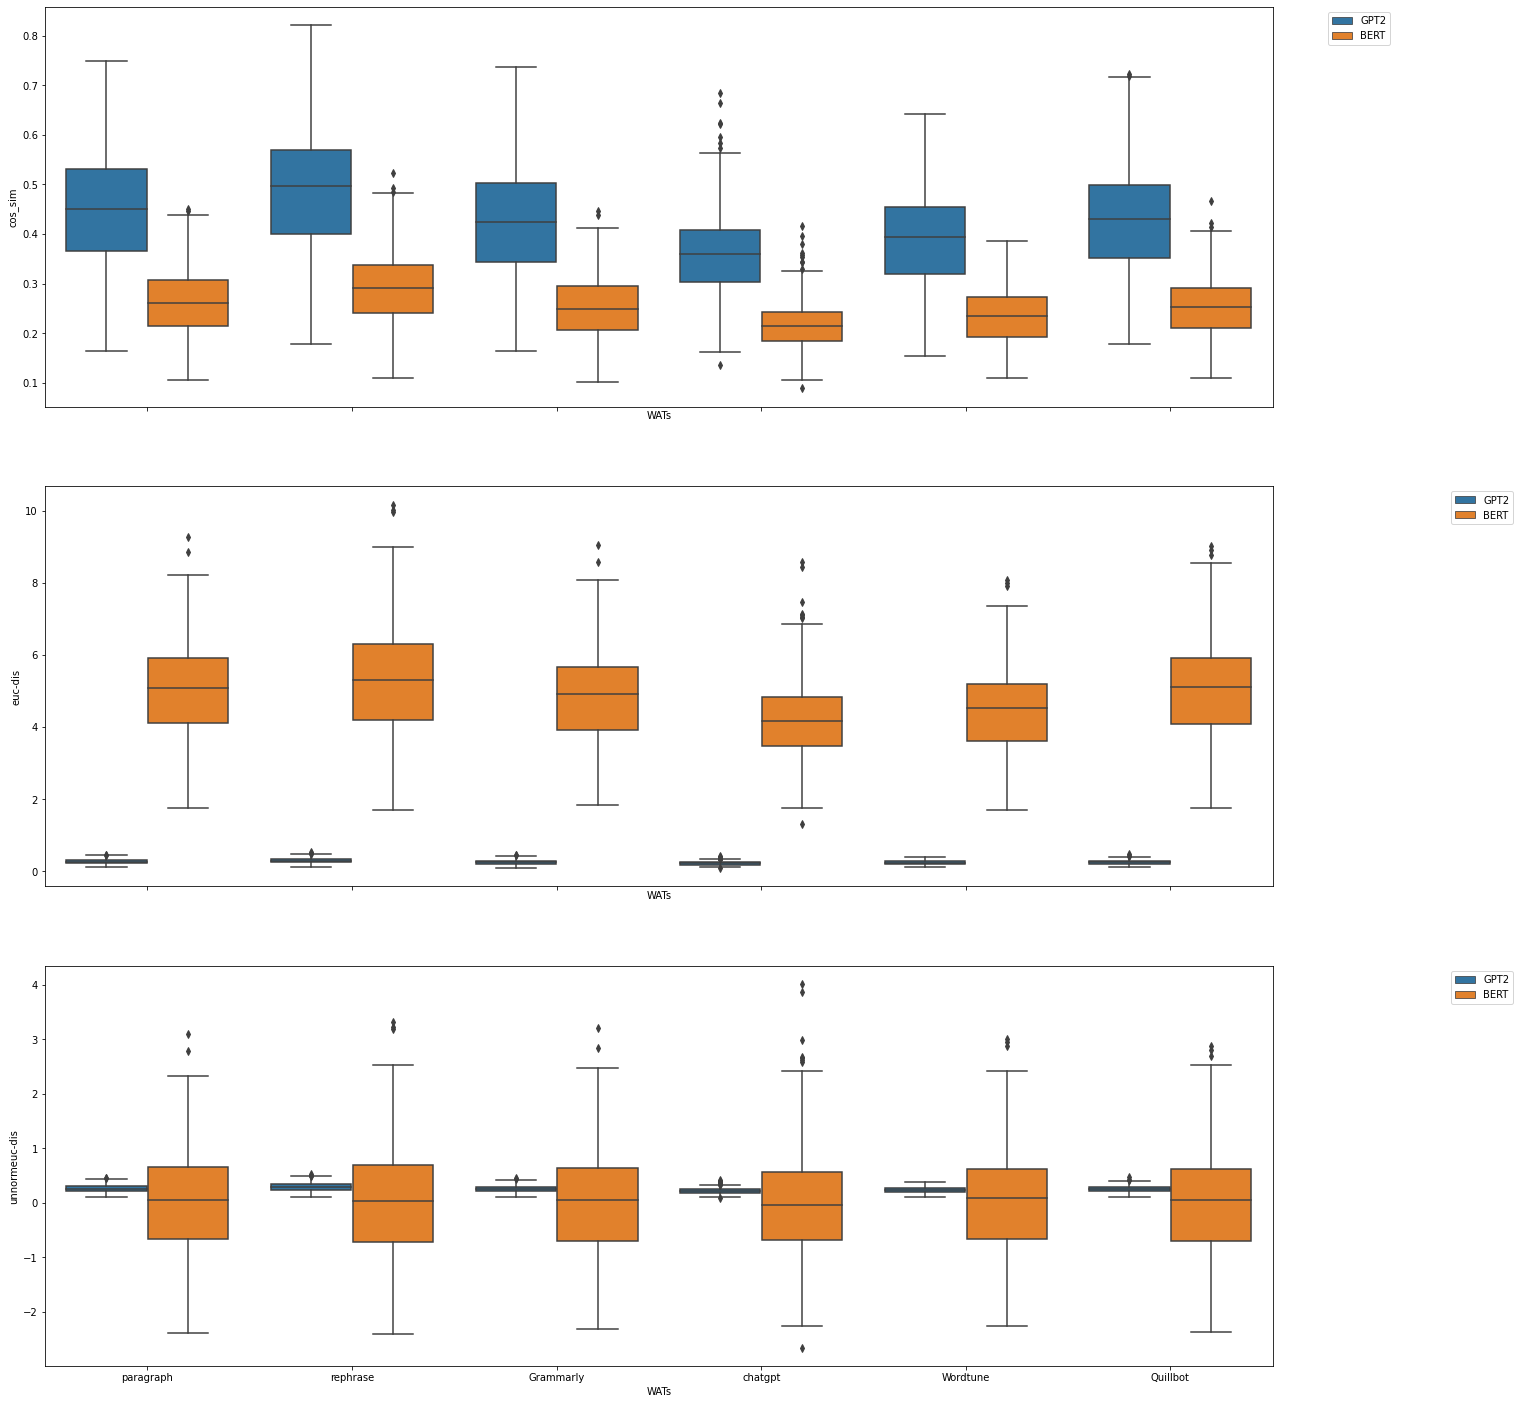

In [12]:
f, axes = plt.subplots(3, 1,sharex=True, figsize=(22,25))

orders = ['GPT2','BERT']
my_pal = {"BERT": "g", "GPT2": "b"}

a = sns.boxplot(y="cos_sim",x= "WATs",hue="LM", data=df_sim,ax=axes[0])
a.legend (bbox_to_anchor = (1.1, 1))
b = sns.boxplot(y="unnormeuc-dis",x= "WATs",hue="LM", data=df_unnorm_euc,ax=axes[2])
b.legend (bbox_to_anchor = (1.2, 1))
c= sns.boxplot(y="euc-dis",x= "WATs",hue="LM", data=df_euc,ax=axes[1])
c.legend (bbox_to_anchor = (1.2, 1))

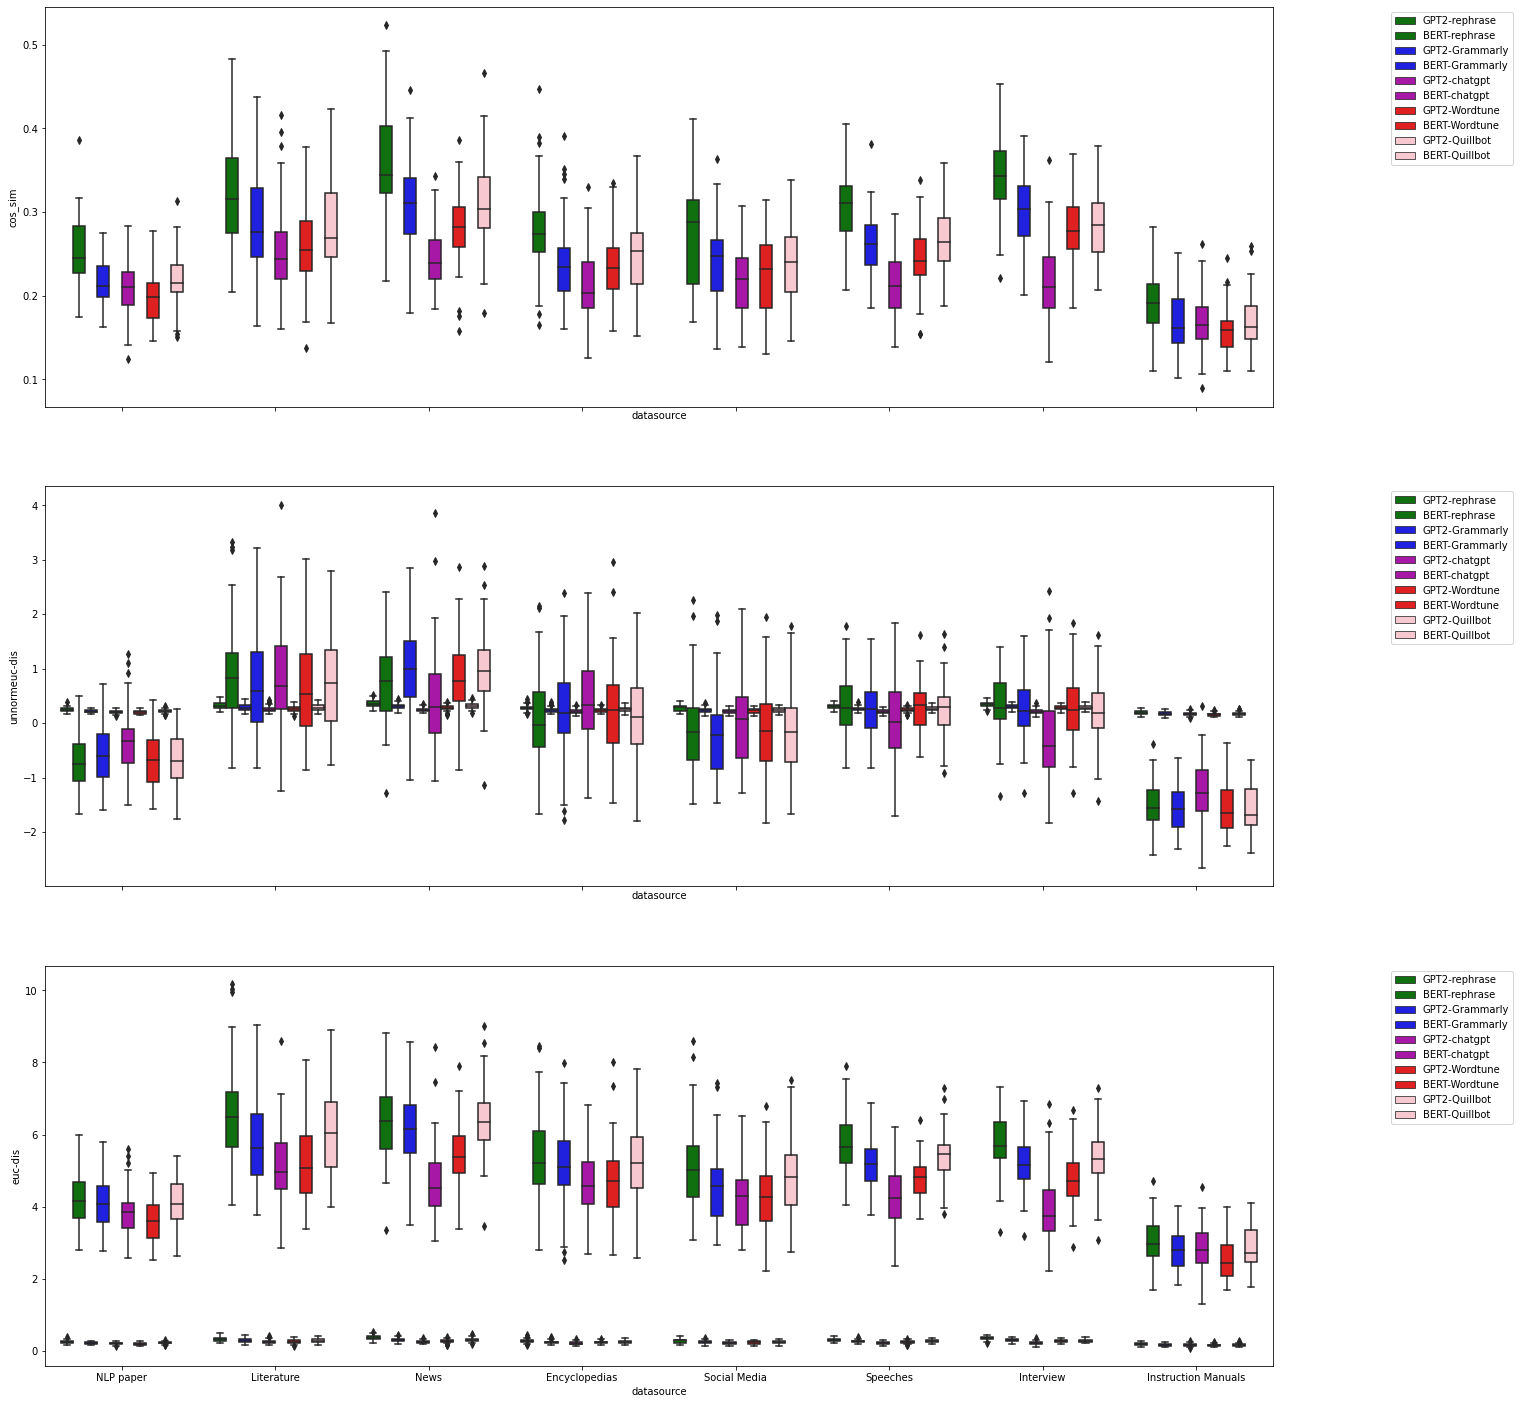

In [13]:
f, axes = plt.subplots(3, 1,sharex=True, figsize=(22,25))

orders = ['GPT2-rephrase','BERT-rephrase','GPT2-Grammarly','BERT-Grammarly','GPT2-chatgpt','BERT-chatgpt','GPT2-Wordtune','BERT-Wordtune','GPT2-Quillbot','BERT-Quillbot']
my_pal = {"GPT2-rephrase": "g", "GPT2-Grammarly": "b", "GPT2-chatgpt":"m","GPT2-Wordtune":"r","GPT2-Quillbot":"pink","BERT-rephrase": "g", "BERT-Grammarly": "b", "BERT-chatgpt":"m","BERT-Wordtune":"r","BERT-Quillbot":"pink"}

a = sns.boxplot(y="cos_sim",x= "datasource",hue="LM-WAT", hue_order = orders,data=df_sim,ax=axes[0],palette=my_pal)
a.legend (bbox_to_anchor = (1.2, 1))
b = sns.boxplot(y="unnormeuc-dis",x= "datasource",hue="LM-WAT", hue_order = orders,data=df_unnorm_euc,ax=axes[1],palette=my_pal)
b.legend (bbox_to_anchor = (1.2, 1))
c= sns.boxplot(y="euc-dis",x= "datasource",hue="LM-WAT",hue_order = orders,data=df_euc,ax=axes[2],palette=my_pal)
c.legend (bbox_to_anchor = (1.2, 1))


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

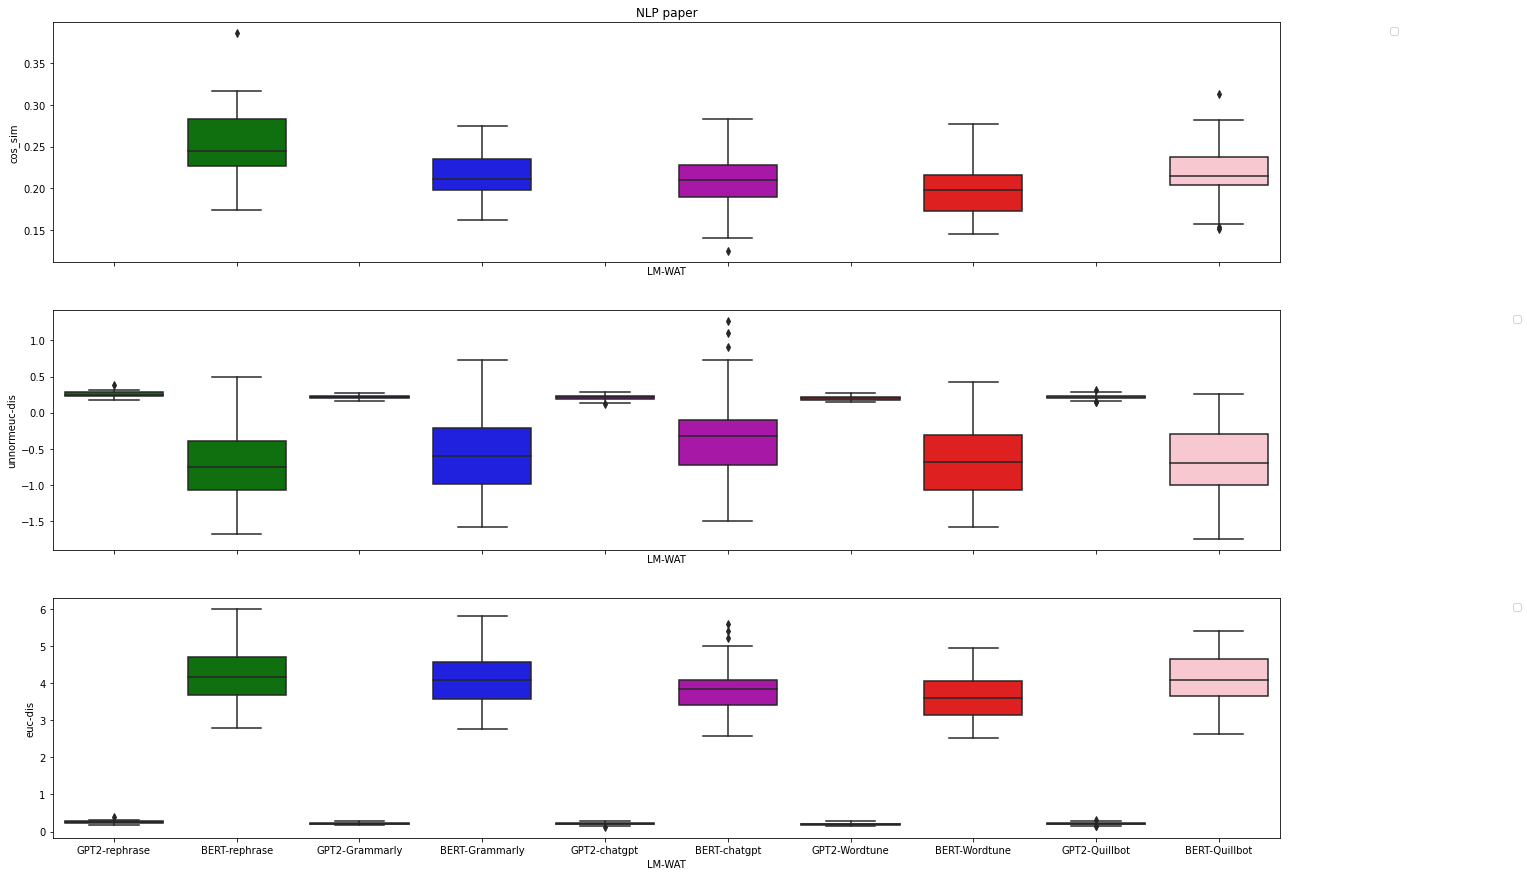

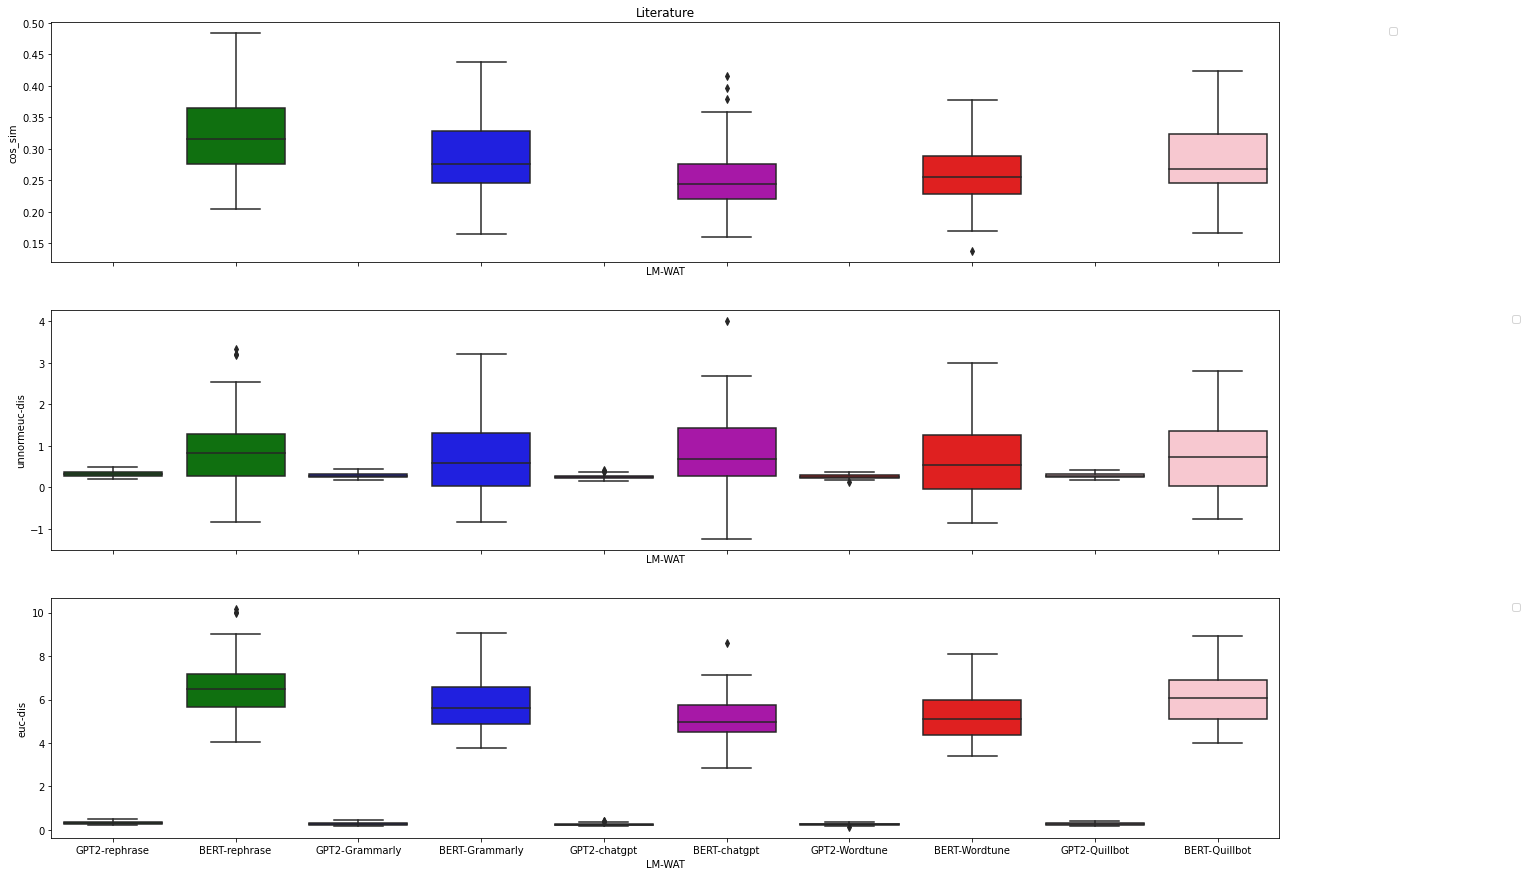

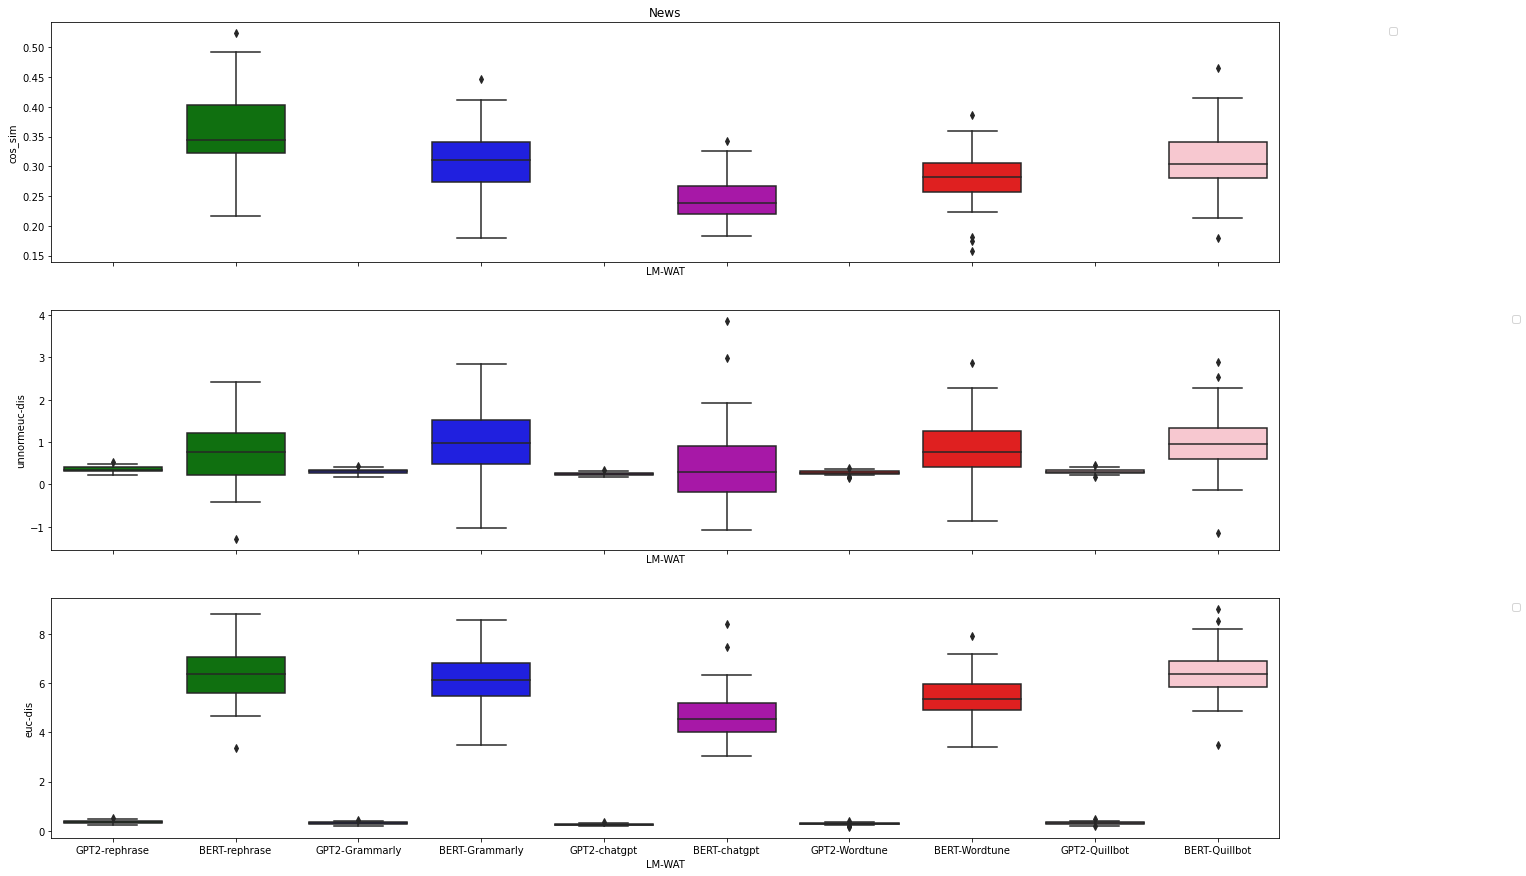

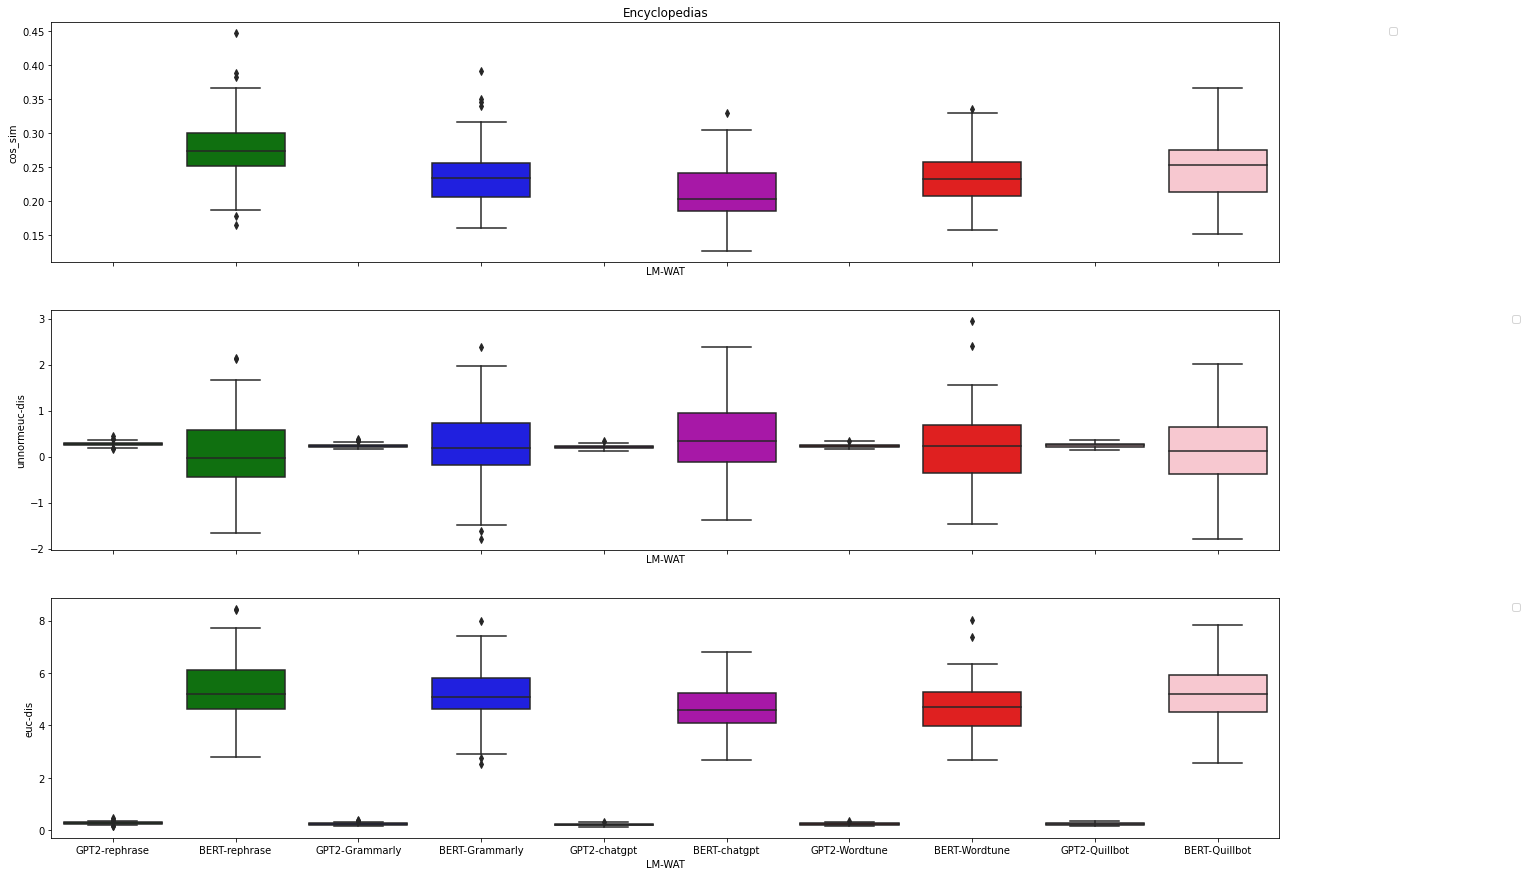

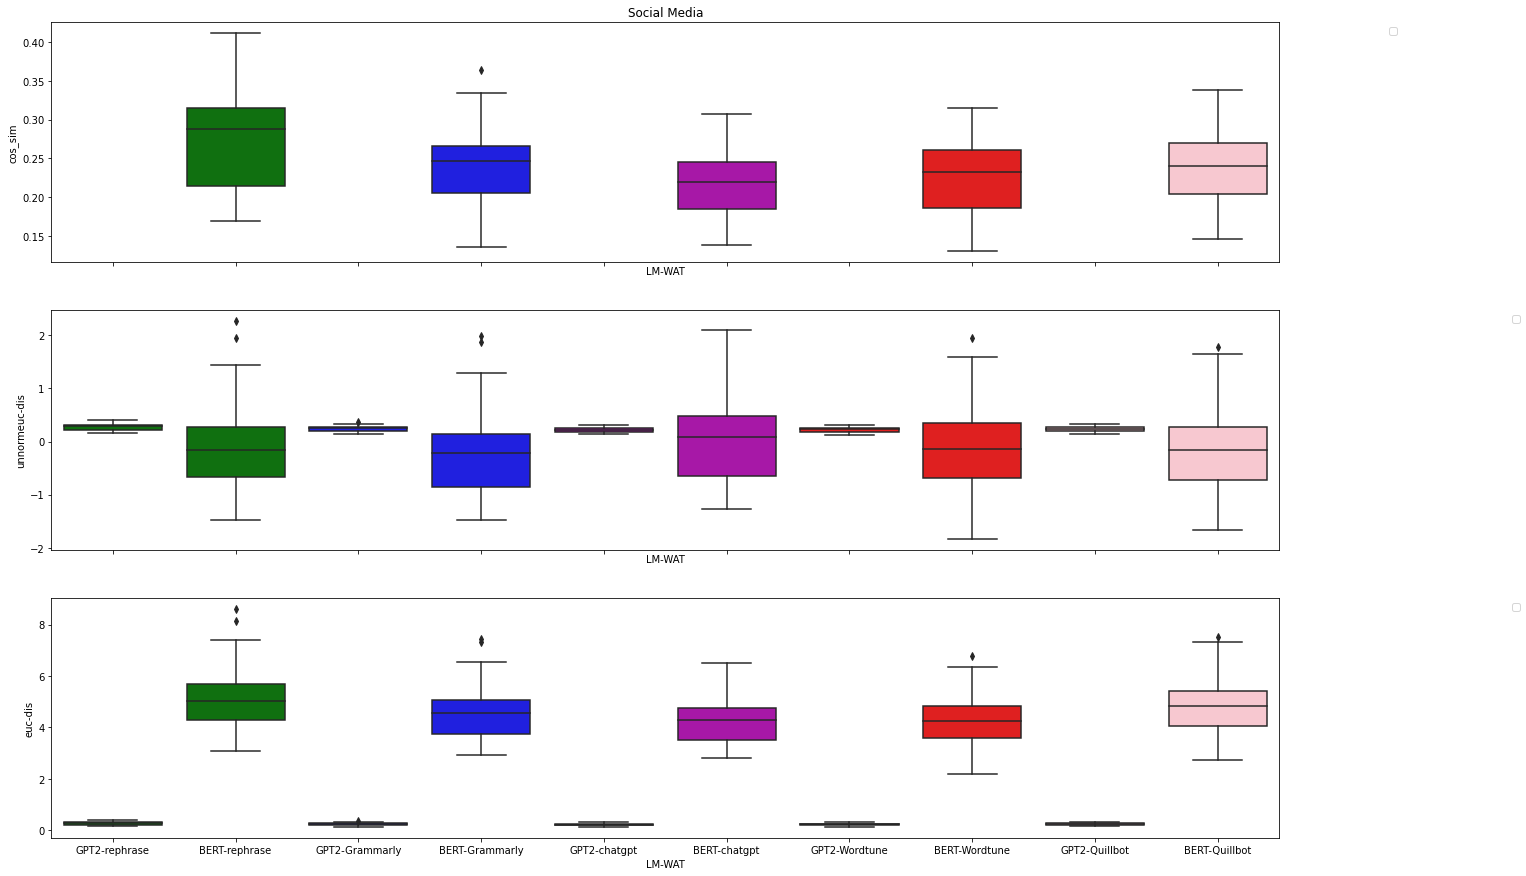

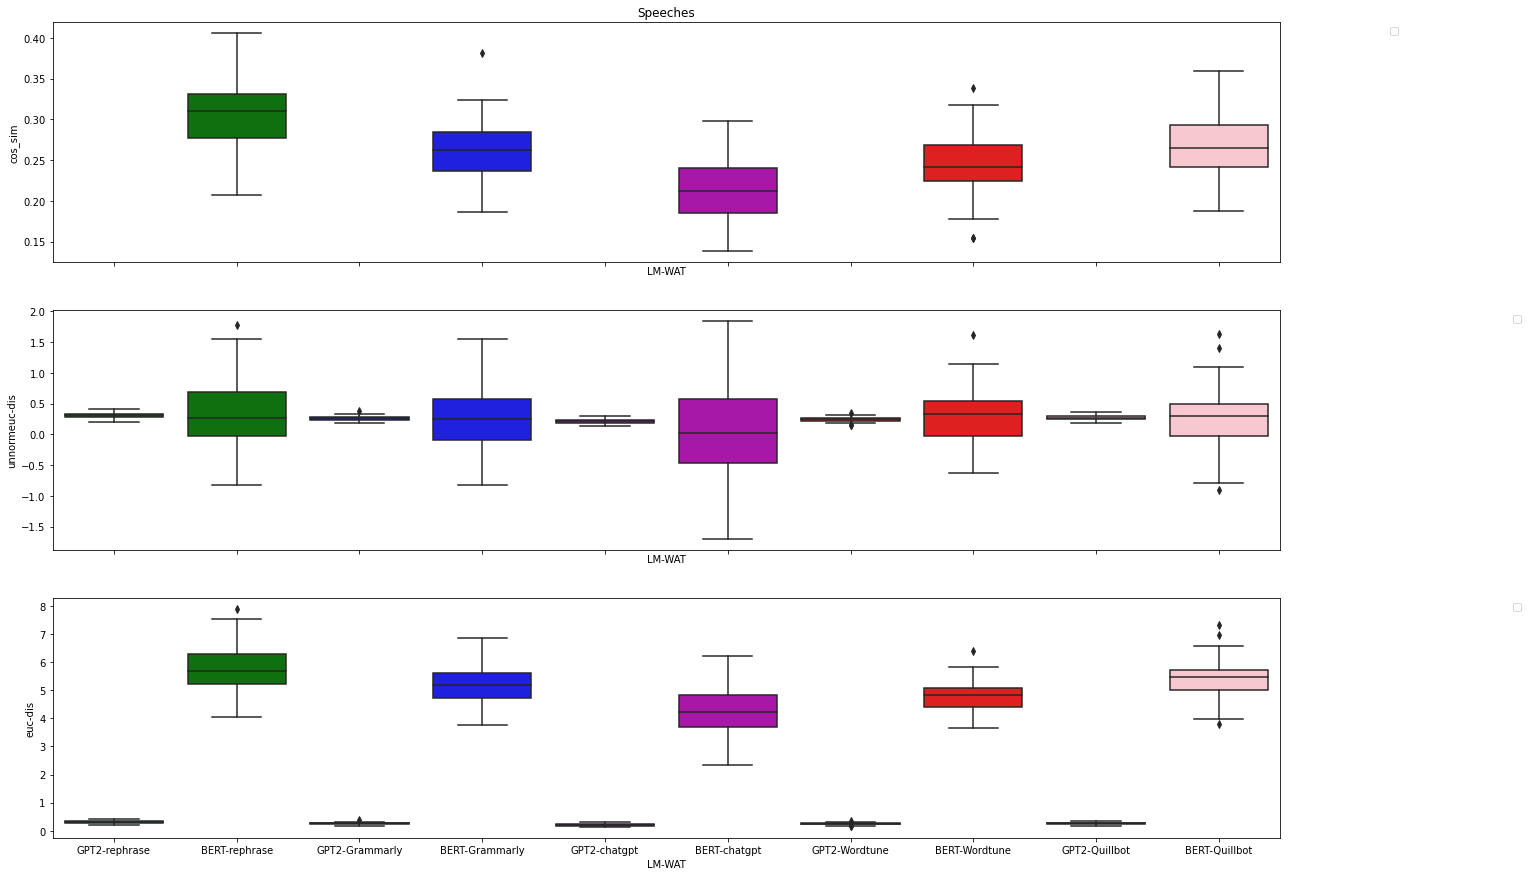

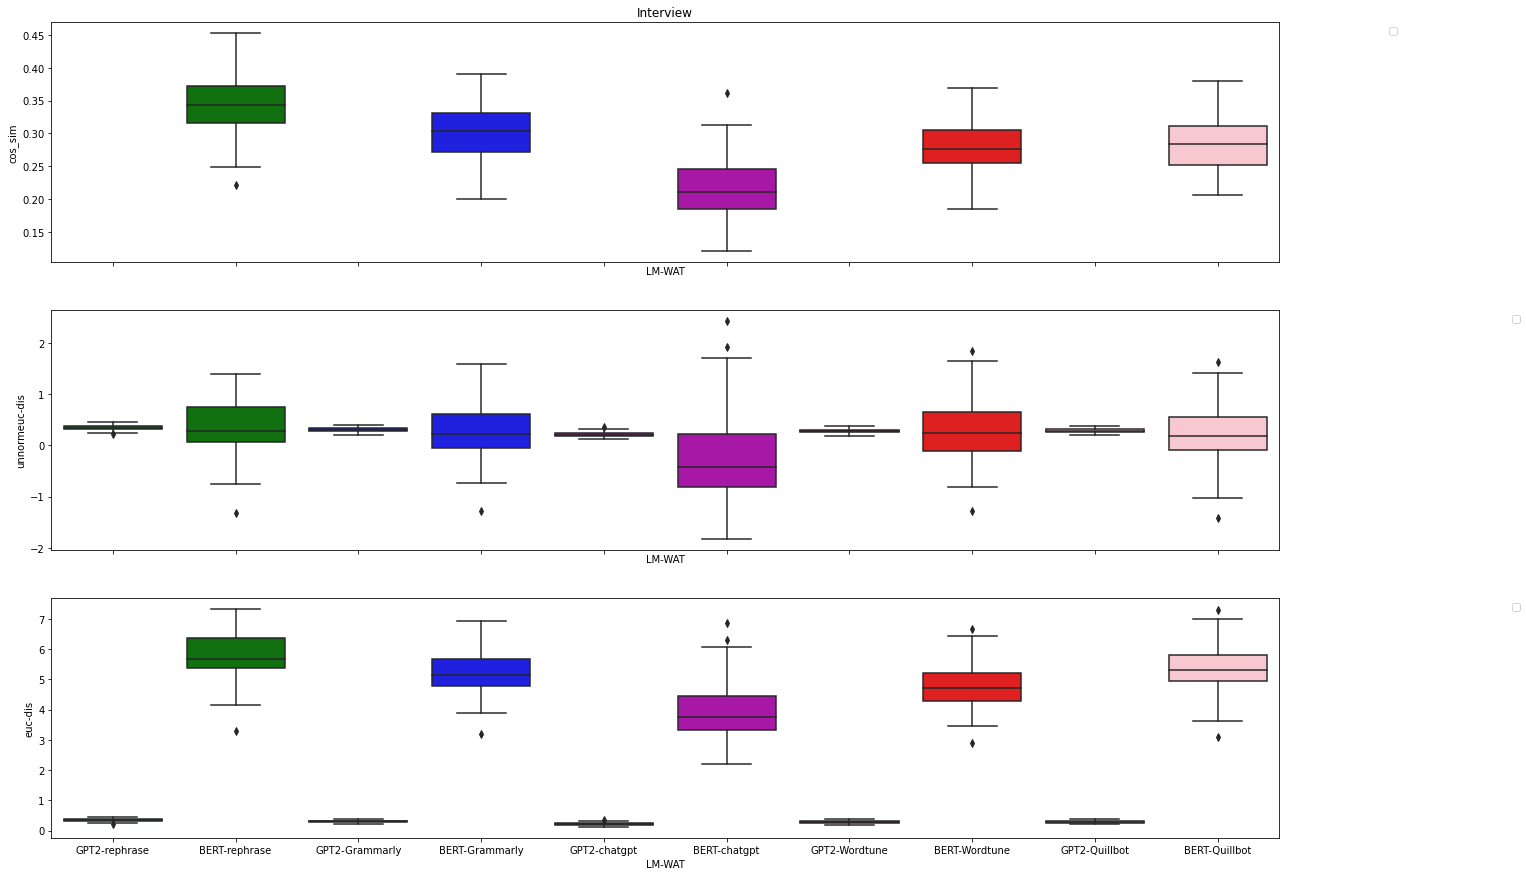

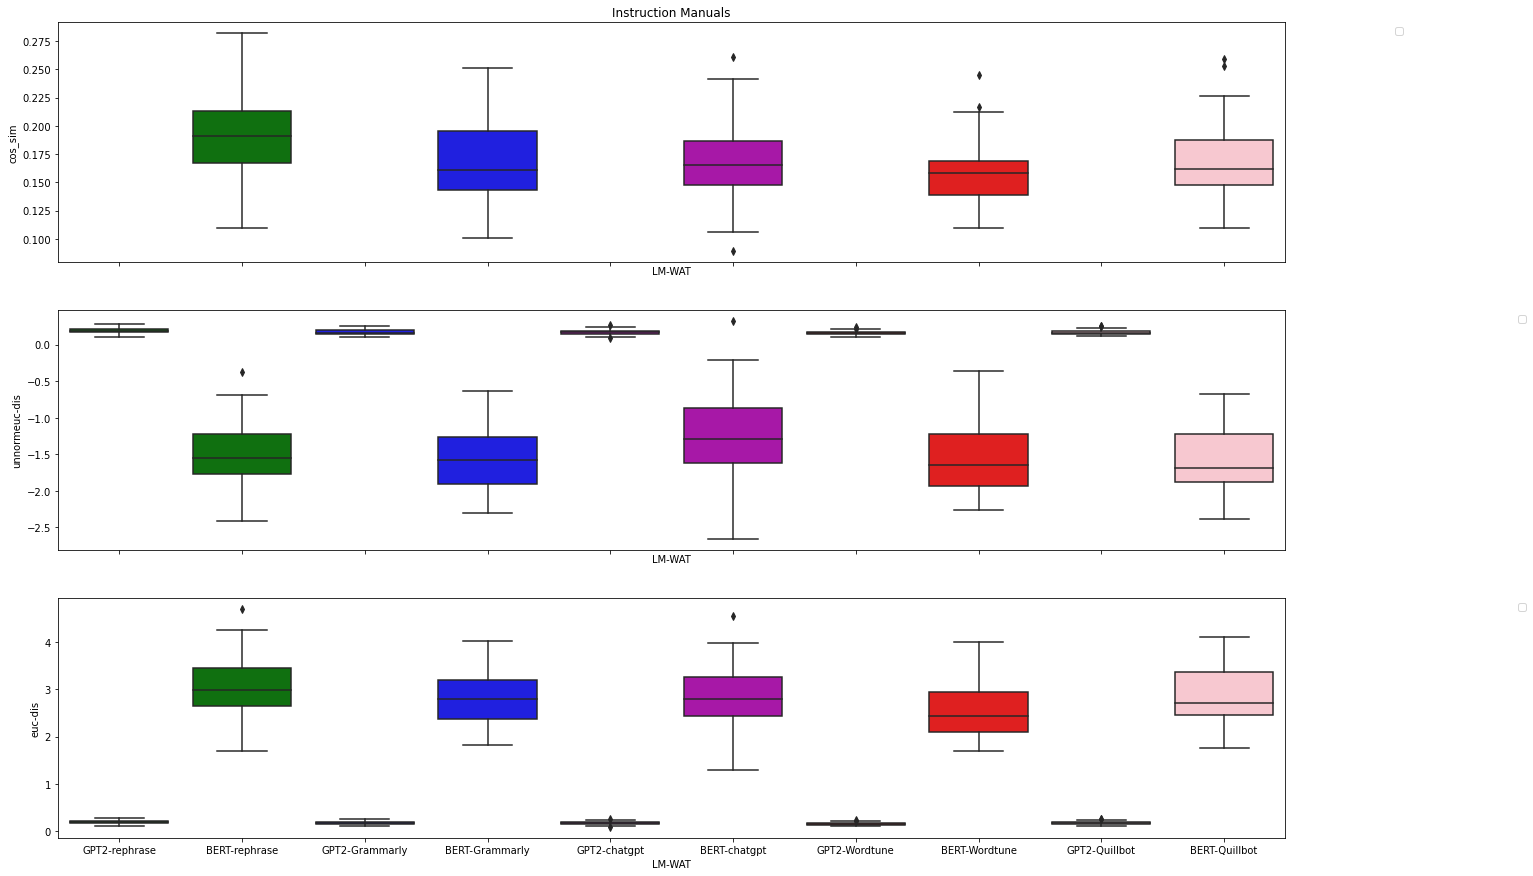

In [14]:
for item in source:
    #print(item)
    orders = ['GPT2-rephrase','BERT-rephrase','GPT2-Grammarly','BERT-Grammarly','GPT2-chatgpt','BERT-chatgpt','GPT2-Wordtune','BERT-Wordtune','GPT2-Quillbot','BERT-Quillbot']
    f, axes = plt.subplots(3, 1,sharex=True, figsize=(22,15))

    df_box1 = df_sim[df_sim['datasource'] == item]
    df_box2 = df_euc[df_euc['datasource'] == item]
    df_box3 = df_unnorm_euc[df_unnorm_euc['datasource'] == item]

    a = sns.boxplot(y="cos_sim",x= "LM-WAT",order=orders,data=df_box1,ax=axes[0],palette=my_pal)
    a.set(title=item)
    a.legend (bbox_to_anchor = (1.1, 1))
        #plt.legend(title='Team', fontsize='1', title_fontsize='4')
    b= sns.boxplot(y="euc-dis",x= "LM-WAT",order=orders,data=df_box2,ax=axes[2],palette=my_pal)
    #b.set(title='Points by Team')
    b.legend (bbox_to_anchor = (1.2, 1))
        #plt.legend(title='Team', fontsize='10', title_fontsize='14')
    c= sns.boxplot(y="unnormeuc-dis",x= "LM-WAT",order=orders,data=df_box3,ax=axes[1],palette=my_pal)
    #b.set(title='Points by Team')
    c.legend (bbox_to_anchor = (1.2, 1))